Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


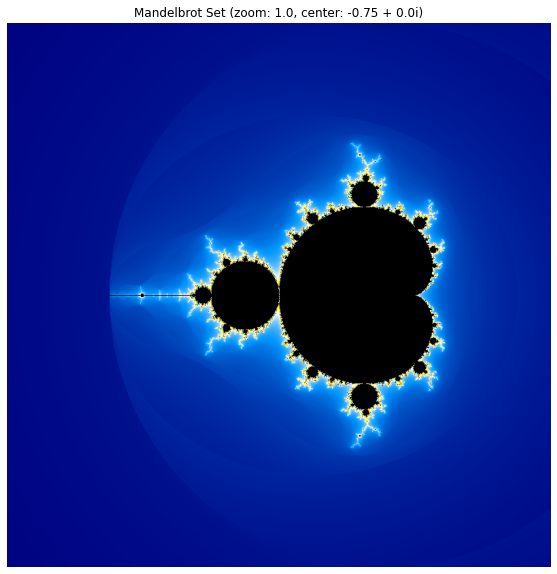

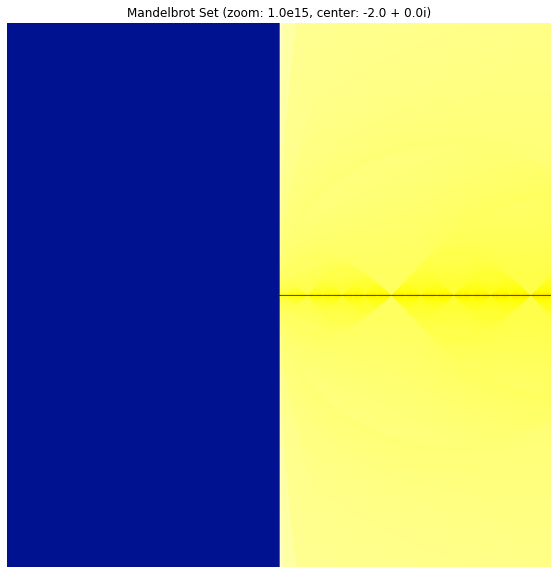

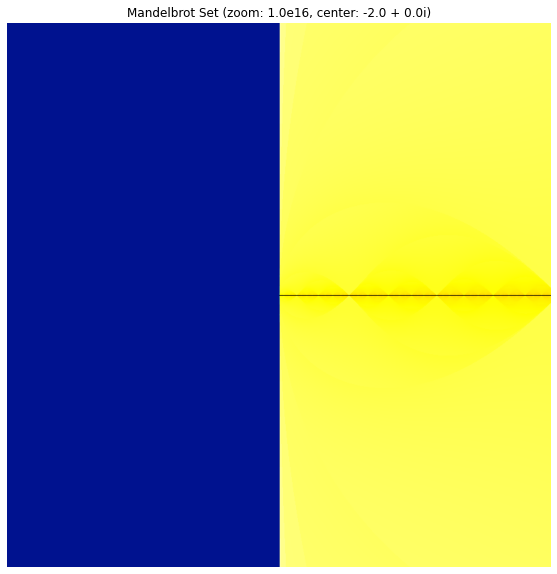

In [1]:
import mandelbrot
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatText, IntText, Button, Output, VBox, HBox, Text

out = Output()

def plot_mandelbrot(width, height, max_iter, center_r, center_i, zoom):
    raw_data = mandelbrot.mandelbrot_set(width, height, max_iter, center_r, center_i, zoom)
    img_array = np.frombuffer(raw_data, dtype=np.uint8).reshape((height, width, 3))
    
    with out:
        out.clear_output(wait=True)
        plt.figure(figsize=(10, 10))
        plt.imshow(img_array)
        plt.axis('off')
        plt.title(f'Mandelbrot Set (zoom: {zoom}, center: {center_r} + {center_i}i)')
#         plt.title(f'Mandelbrot Set (zoom: {zoom:.2e}, center: {center_r:.6f} + {center_i:.6f}i)')

        plt.show()

width = IntText(value=800, description='Width:')
height = IntText(value=800, description='Height:')
max_iter = IntText(value=1000, description='Max Iterations:')
center_r = Text(value="-0.75", description='Center Real:')
center_i = Text(value="0.0", description='Center Imag:')
zoom = Text(value="1.0", description='Zoom:')

button = Button(description="Generate Mandelbrot")

def on_button_clicked(b):
    plot_mandelbrot(width.value, height.value, max_iter.value, center_r.value, center_i.value, zoom.value)

button.on_click(on_button_clicked)

inputs = VBox([width, height, max_iter, center_r, center_i, zoom, button])
display(HBox([inputs, out]))

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


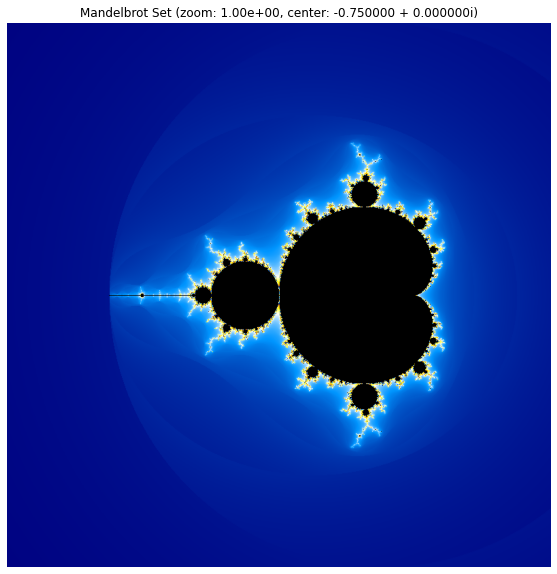

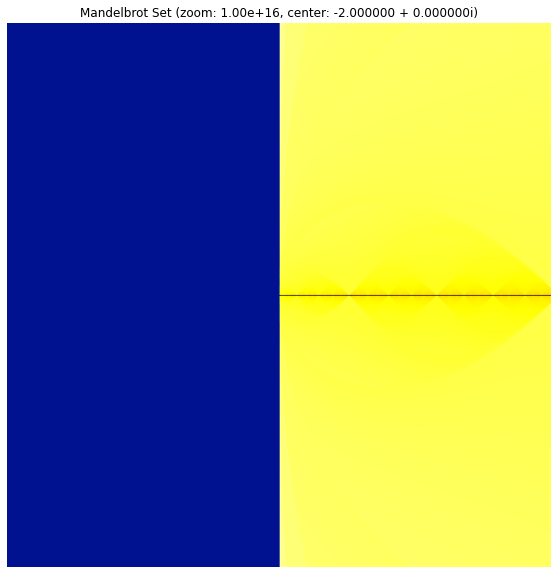

In [1]:
import mandelbrot
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatText, IntText, Button, Output, VBox, HBox

out = Output()

def plot_mandelbrot(width, height, max_iter, center_r, center_i, zoom):
    raw_data = mandelbrot.mandelbrot_set(width, height, max_iter, center_r, center_i, zoom)
    img_array = np.frombuffer(raw_data, dtype=np.uint8).reshape((height, width, 3))
    
    with out:
        out.clear_output(wait=True)
        plt.figure(figsize=(10, 10))
        plt.imshow(img_array)
        plt.axis('off')
        plt.title(f'Mandelbrot Set (zoom: {zoom:.2e}, center: {center_r:.6f} + {center_i:.6f}i)')
        plt.show()

width = IntText(value=800, description='Width:')
height = IntText(value=800, description='Height:')
max_iter = IntText(value=1000, description='Max Iterations:')
center_r = FloatText(value=-0.75, description='Center Real:')
center_i = FloatText(value=0.0, description='Center Imag:')
zoom = FloatText(value=1.0, description='Zoom:')

button = Button(description="Generate Mandelbrot")

def on_button_clicked(b):
    plot_mandelbrot(width.value, height.value, max_iter.value, center_r.value, center_i.value, zoom.value)

button.on_click(on_button_clicked)

inputs = VBox([width, height, max_iter, center_r, center_i, zoom, button])
display(HBox([inputs, out]))